# MTH5001 Introduction to Computer Programming - Lecture 3a
## Module organisers Dr. Lennart Dabelow and Prof. Thomas Prellberg

In [1]:
import numpy as np # import some standard modules, just in case we need them
import matplotlib.pyplot as plt

Last week we finished by introducing sequence data: lists, tuples, and ranges. 

This week we'll continue with more on sequences, introducing a technique called slicing.

We'll briefly talk about generators and end with revisiting plotting, and covering built-in functions.

## More on sequences

### Reminder 1: indexing

In [2]:
fibonacci=[1,1,2,3,5,8,13,21,34,55,89,144,233]
print(fibonacci[0],fibonacci[1]) # indexing starts at ZERO !!!
print(fibonacci[4])
print(fibonacci[-1]) # last element of the list
print(fibonacci[len(fibonacci)-1])

1 1
5
233
233


### Reminder 2: list comprehension

Verify that the list really contains Fibonacci numbers by taking differences of neighbouring entries

In [3]:
fibonacci=[1,1,2,3,5,8,13,21,34,55,89,144,233]
print([fibonacci[i+1]-fibonacci[i] for i in range(len(fibonacci)-1)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


### Slice

We can select sublists (slices) from a list by using two indices separated by a colon. The first index is the start index, and the second one is the first excluded index (stop index, just like in the `range` function). The indices can also be omitted.

In [4]:
print(fibonacci)
print(fibonacci[4:])
print(fibonacci[4:4+3])
print(fibonacci[:7])
print(fibonacci[:])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
[5, 8, 13, 21, 34, 55, 89, 144, 233]
[5, 8, 13]
[1, 1, 2, 3, 5, 8, 13]
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]


For example, the slice (sublist) `fibonacci[4:7]` consists of `fibonacci[4]`, `fibonacci[5]` and `fibonacci[6]`, but not `fibonacci[7]`, and the number of entries in this slice is equal to $7-4=3$.

Consistent with this, a slice with both indices being equal is an empty list.

In [5]:
print(fibonacci[5:5])
print(len([]))
print(fibonacci[5:4])

[]
0
[]


As above, we can also use negative indices. For example, the slice `fibonacci[3:-2]` starts at  the entry with index $3$ and omits the final two entries.

In [6]:
print(fibonacci[3:-2])
print(fibonacci[-10:7])

[3, 5, 8, 13, 21, 34, 55, 89]
[3, 5, 8, 13]


Slicing with `[-n:]` gives the last $n$ entries.

In [7]:
fibonacci[-4:]

[55, 89, 144, 233]

Finally, by giving a third argument, we can skip over entries. To give out every second entry in the list, we can write the following.

In [8]:
print(fibonacci)
print(fibonacci[0:8:2])
print(fibonacci[1:13:2])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
[1, 2, 5, 13]
[1, 3, 8, 21, 55, 144]


In other words, selecting a slice with `[start:stop:step]` picks out the elements with indices in `range(start, stop, step)`, and just like with the range function, we can omit arguments, in which case they assume their default values: `start=0`, `step=1`, and `stop` the length of the list that is being sliced.

Slicing works also with tuples:

In [5]:
today=(2019,'February',21)
print(today)

(2019, 'February', 21)


In [6]:
print(today[0])
print(today[0:1])
print(today[1:3])

2019
(2019,)
('February', 21)


In [7]:
(2018+1,)

(2019,)

### Generators

In [8]:
print(type(3))

<class 'int'>


When writing code, you may already have noticed that sometimes we get as output `< ... >`. This happens because of how Python stores data internally. You may for example have gotten output such as `[<matplotlib.lines.Line2D at 0x124255d90>]` when plotting. Here are more examples, showing that ranges, tuples, and lists are treated differently.

In [9]:
[2*i for i in range(5)]

[0, 2, 4, 6, 8]

In [10]:
(2*i for i in range(5))

<generator object <genexpr> at 0x7f813b39cad0>

If you encounter this, you can get the result you presumably desired by converting the generator to a tuple by using `tuple()`

In [11]:
tuple((2*i for i in range(5)))

(0, 2, 4, 6, 8)

In [15]:
list((2*i for i in range(5)))

[0, 2, 4, 6, 8]

This is similar to using `list()` or `tuple()` on a range:

In [16]:
range(5)

range(0, 5)

In [17]:
list(range(5))

[0, 1, 2, 3, 4]

In [18]:
tuple(range(5))

(0, 1, 2, 3, 4)

### Lists and Plotting

Now that we have discussed lists in Python, we shall briefly revisit plotting. 

In [19]:
import matplotlib.pyplot as plt
import numpy as np

Let's assume we want to plot a function defined only for integer values, such as Euler's totient function $\varphi(n)$, which counts the number of positive integers $m$ less than a given positive integer $n$ that are relatively prime to it, i.e. $gcd(n,m)=1$:

$$\varphi(n)=\left|\left\{m\in\mathbb N: m<n, gcd(n,m)=1\right\}\right|$$

A bit of googling shows that the totient function is defined in the module `sympy`, so we simply import this module.

In [21]:
import sympy as sp

We can compute it for a few examples. For example, $12$ is coprime to $1,5,7,11$ (but not to $2,3,4,6,8,9,10$) so that $\varphi(12)$ should be $4$.

In [22]:
sp.totient(12)

4

We can use a list to give out $\varphi(n)$ for a range of values of $n$.

In [23]:
print([sp.totient(n) for n in range(1,101)])

[1, 1, 2, 2, 4, 2, 6, 4, 6, 4, 10, 4, 12, 6, 8, 8, 16, 6, 18, 8, 12, 10, 22, 8, 20, 12, 18, 12, 28, 8, 30, 16, 20, 16, 24, 12, 36, 18, 24, 16, 40, 12, 42, 20, 24, 22, 46, 16, 42, 20, 32, 24, 52, 18, 40, 24, 36, 28, 58, 16, 60, 30, 36, 32, 48, 20, 66, 32, 44, 24, 70, 24, 72, 36, 40, 36, 60, 24, 78, 32, 54, 40, 82, 24, 64, 42, 56, 40, 88, 24, 72, 44, 60, 46, 72, 32, 96, 42, 60, 40]


This doesn't seem to tell us much. To really appreciate this function, we should try plotting it. The plotting function accepts lists of $x$ and $y$ coordinates.

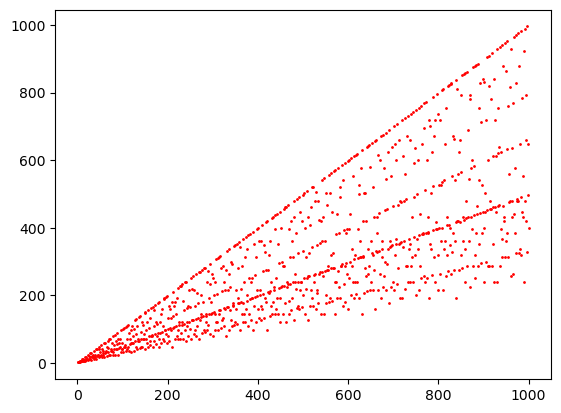

In [24]:
x=list(range(1,1001))
y=[sp.totient(n) for n in x]
plt.plot(x,y,'ro',markersize=1)
plt.show()

Note that I have used some nice formatting shortcut here: 'ro' means red circles as markers and no lines. For details, and help on everything pyplot related, see https://matplotlib.org/tutorials/introductory/pyplot.html.

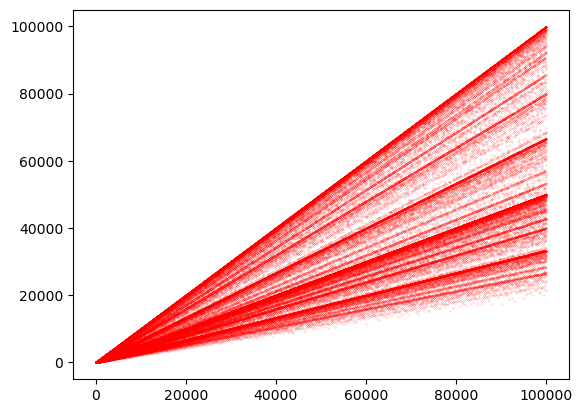

In [25]:
x=list(range(1,100001))
y=[sp.totient(n) for n in x]
plt.plot(x,y,'ro',markersize=0.1)
plt.show()

This shows that the behaviour of $\varphi(n)$ seems to show some structure but is also intriguingly complicated. You can read up on this function [here](https://en.wikipedia.org/wiki/Euler's_totient_function).

## Conclusion and Outlook

In this lecture we have discussed sequences and revisited plotting. We will continue with more plotting in the next lecture.